In [1]:
import sys
sys.path.append('unfolding')
sys.path.append('OmniLearn/preprocessing')

import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_handler as dh
import energyflow as ef

from omnifold import binned_omnifold, unbinned_omnifold 
from preprocess_omnifold import get_substructure_obs

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Settings

In [2]:
smearing_function = "calo"
N_events = 10000

## Data from Pythia & Herwig

In [3]:
#Data Loading
pythia = ef.zjets_delphes.load('Pythia26', num_data=N_events, cache_dir="./", pad=True) # Generator
herwig = ef.zjets_delphes.load('Herwig', num_data=N_events, cache_dir="./", pad=True)  # Detector

pythia_trans_sim, pythia_trans_gen = get_substructure_obs(pythia)
herwig_trans_sim, herwig_trans_gen = get_substructure_obs(herwig)

labels = ['mass', 'width', 'mult', 'lnrho', 'zgs', 'tau21']

print(pythia.keys())
print(herwig.keys())

sim_data = pythia_trans_sim # Detector Simulation 
mc_data = pythia_trans_gen # Monte Carlo Truth Level
meas_data =  herwig_trans_sim # Experimental Data
true_data = herwig_trans_gen # True Distribution

sim_data_df = pd.DataFrame(sim_data, columns=['sim_data_mass', 'sim_data_width', 'sim_data_mult', 'sim_data_lnrho', 'sim_data_zgs', 'sim_data_tau21'])
mc_data_df = pd.DataFrame(mc_data, columns=['mc_data_mass', 'mc_data_width', 'mc_data_mult', 'mc_data_lnrho', 'mc_data_zgs', 'mc_data_tau21'])
meas_data_df = pd.DataFrame(meas_data, columns=['meas_data_mass', 'meas_data_width', 'meas_data_mult', 'meas_data_lnrho', 'meas_data_zgs', 'meas_data_tau21'])
true_data_df = pd.DataFrame(true_data, columns=['true_data_mass', 'true_data_width', 'true_data_mult', 'true_data_lnrho', 'true_data_zgs', 'true_data_tau21'])



def check_data_integrity(df, name):
    if df.isnull().values.any():
        print(f"{name} contains None or NaN values.")
    else:
        pass

check_data_integrity(sim_data_df, "sim_data_df")
check_data_integrity(mc_data_df, "mc_data_df")
check_data_integrity(meas_data_df, "meas_data_df")
check_data_integrity(true_data_df, "true_data_df")

dict_keys(['gen_lhas', 'gen_sdms', 'gen_mults', 'gen_particles', 'gen_tau2s', 'gen_zgs', 'gen_ang2s', 'gen_jets', 'gen_widths', 'gen_Zs', 'sim_lhas', 'sim_sdms', 'sim_mults', 'sim_particles', 'sim_tau2s', 'sim_zgs', 'sim_ang2s', 'sim_jets', 'sim_widths'])
dict_keys(['gen_lhas', 'gen_sdms', 'gen_mults', 'gen_particles', 'gen_tau2s', 'gen_zgs', 'gen_ang2s', 'gen_jets', 'gen_widths', 'gen_Zs', 'sim_lhas', 'sim_sdms', 'sim_mults', 'sim_particles', 'sim_tau2s', 'sim_zgs', 'sim_ang2s', 'sim_jets', 'sim_widths'])


In [4]:
print(sim_data.shape)
sim_data_df.head(10)

(10000, 6)


,sim_data_mass,sim_data_width,sim_data_mult,sim_data_lnrho,sim_data_zgs,sim_data_tau21
0,25.658556,0.086946,24.0,-8.469723,0.137407,0.997658
1,16.669470,0.262105,11.0,-4.444990,0.164015,0.610651
2,14.180049,0.075102,13.0,-8.972215,0.415807,0.721529
3,45.823811,0.305450,35.0,-3.611549,0.134590,0.504057
4,24.059109,0.041906,25.0,-9.265441,0.253641,0.822513
5,5.777443,0.063855,13.0,-7.981515,0.341487,0.605860
6,18.640936,0.191078,28.0,-5.625474,0.117018,0.757538
7,28.189669,0.064333,14.0,-7.291107,0.210065,0.464056
8,13.297179,0.071439,20.0,-11.323876,0.134950,0.864803
9,12.511571,0.155447,25.0,-6.939207,0.206547,0.704269


In [5]:
print(mc_data.shape)
mc_data_df.head(10)

(10000, 6)


,mc_data_mass,mc_data_width,mc_data_mult,mc_data_lnrho,mc_data_zgs,mc_data_tau21
0,28.105358,0.070360,37.0,-7.450535,0.131177,1.010430
1,14.882744,0.206225,22.0,-4.993340,0.301911,0.879548
2,27.174328,0.116504,24.0,-9.151955,0.373738,0.453487
3,46.210918,0.292143,37.0,-3.646999,0.142383,0.417967
4,30.762379,0.028953,34.0,-12.448340,0.213502,0.933399
5,9.447888,0.066937,20.0,-6.928104,0.387665,0.477013
6,24.233778,0.181547,42.0,-5.641846,0.452374,0.791018
7,13.342625,0.021096,22.0,-10.254565,0.404438,0.760041
8,15.031196,0.070896,29.0,-11.469010,0.130219,0.608210
9,19.692316,0.116790,37.0,-6.600195,0.149198,0.963202


In [6]:
print(meas_data.shape)
meas_data_df.head(10)

(10000, 6)


,meas_data_mass,meas_data_width,meas_data_mult,meas_data_lnrho,meas_data_zgs,meas_data_tau21
0,28.738432,0.181398,19.0,-5.348513,0.118558,0.702768
1,10.101647,0.050587,14.0,-8.731314,0.245294,0.738157
2,28.075920,0.418242,26.0,-3.317518,0.319542,0.385021
3,22.694643,0.177209,34.0,-4.728694,0.124362,0.694969
4,17.703085,0.194373,8.0,-5.044482,0.314071,0.169461
5,23.276543,0.394069,11.0,-3.406477,0.157140,0.669812
6,10.022687,0.068429,18.0,-6.881289,0.245318,0.560445
7,59.994705,0.439127,46.0,-3.299920,0.101724,0.561597
8,9.538355,0.124899,15.0,-6.843791,0.449453,0.797330
9,5.005620,0.024681,6.0,-9.679719,0.142838,0.688017


In [7]:
print(true_data.shape)
true_data_df.head(10)

(10000, 6)


,true_data_mass,true_data_width,true_data_mult,true_data_lnrho,true_data_zgs,true_data_tau21
0,30.986725,0.184642,25.0,-5.994063,0.125005,0.463290
1,25.300236,0.062976,26.0,-9.029106,0.235934,1.026703
2,28.079298,0.399820,30.0,-3.369189,0.296135,0.390994
3,25.191778,0.179246,38.0,-4.627653,0.131124,0.695649
4,13.962789,0.049543,23.0,-10.115383,0.218676,0.941967
5,12.177867,0.135815,19.0,-6.850666,0.127167,0.663176
6,20.094116,0.077449,28.0,-7.621782,0.435532,0.596417
7,61.296356,0.440350,57.0,-3.183834,0.119014,0.576355
8,13.416775,0.112692,23.0,-6.410249,0.493753,0.805735
9,14.550771,0.032925,11.0,-9.651913,0.152154,0.813058


In [8]:
sim_data_mass, sim_data_width, sim_data_mult, sim_data_lnrho, sim_data_zgs, sim_data_tau21 = [], [], [], [], [], []
mc_data_mass, mc_data_width, mc_data_mult, mc_data_lnrho, mc_data_zgs, mc_data_tau21 = [], [], [], [], [], []
meas_data_mass, meas_data_width, meas_data_mult, meas_data_lnrho, meas_data_zgs, meas_data_tau21 = [], [], [], [], [], []
true_data_mass, true_data_width, true_data_mult, true_data_lnrho, true_data_zgs, true_data_tau21 = [], [], [], [], [], []


for i in range(len(sim_data)):
    sim_data_mass.append(sim_data[i][0])
    sim_data_width.append(sim_data[i][1])
    sim_data_mult.append(sim_data[i][2])
    sim_data_lnrho.append(sim_data[i][3])
    sim_data_zgs.append(sim_data[i][4])
    sim_data_tau21.append(sim_data[i][5])

for i in range(len(mc_data)):
    mc_data_mass.append(mc_data[i][0])
    mc_data_width.append(mc_data[i][1])
    mc_data_mult.append(mc_data[i][2])
    mc_data_lnrho.append(mc_data[i][3])
    mc_data_zgs.append(mc_data[i][4])
    mc_data_tau21.append(mc_data[i][5])

for i in range(len(meas_data)):
    meas_data_mass.append(meas_data[i][0])
    meas_data_width.append(meas_data[i][1])
    meas_data_mult.append(meas_data[i][2])
    meas_data_lnrho.append(meas_data[i][3])
    meas_data_zgs.append(meas_data[i][4])
    meas_data_tau21.append(meas_data[i][5])

for i in range(len(true_data)):
    true_data_mass.append(true_data[i][0])
    true_data_width.append(true_data[i][1])
    true_data_mult.append(true_data[i][2])
    true_data_lnrho.append(true_data[i][3])
    true_data_zgs.append(true_data[i][4])
    true_data_tau21.append(true_data[i][5])

#Binned Data
bins_mass, bin_low_mass, bin_high_mass  = 50, 0, 80
bins_widths, bin_low_widths, bin_high_widths = 50, 0, 0.6
bins_mult, bin_low_mult, bin_high_mult = 80, 0, 80
bins_lnrho, bin_low_lnrho, bin_high_lnrho = 50, -14, -2
bins_zgs, bin_low_zgs, bin_high_zgs = 50, 0, 0.5
bins_tau21, bin_low_tau21, bin_high_tau21 = 50, 0, 1.2

sim_data_mass_binned = ROOT.TH1D("sim_mass_hist", "sim_mass_hist", bins_mass, bin_low_mass, bin_high_mass)
mc_data_mass_binned = ROOT.TH1D("mc_mass_hist", "mc_mass_hist", bins_mass, bin_low_mass, bin_high_mass)
meas_data_mass_binned = ROOT.TH1D("meas_mass_hist", "meas_mass_hist", bins_mass, bin_low_mass, bin_high_mass)
true_data_mass_binned = ROOT.TH1D("true_mass_hist", "true_mass_hist", bins_mass, bin_low_mass, bin_high_mass)

sim_data_width_binned = ROOT.TH1D("sim_width_hist", "sim_width_hist", bins_widths, bin_low_widths, bin_high_widths)
mc_data_width_binned = ROOT.TH1D("mc_width_hist", "mc_width_hist", bins_widths, bin_low_widths, bin_high_widths)
meas_data_width_binned = ROOT.TH1D("meas_width_hist", "meas_width_hist", bins_widths, bin_low_widths, bin_high_widths)
true_data_width_binned = ROOT.TH1D("true_width_hist", "true_width_hist", bins_widths, bin_low_widths, bin_high_widths)

sim_data_mult_binned = ROOT.TH1D("sim_mult_hist", "sim_mult_hist", bins_mult, bin_low_mult, bin_high_mult)
mc_data_mult_binned = ROOT.TH1D("mc_mult_hist", "mc_mult_hist", bins_mult, bin_low_mult, bin_high_mult)
meas_data_mult_binned = ROOT.TH1D("meas_mult_hist", "meas_mult_hist", bins_mult, bin_low_mult, bin_high_mult)
true_data_mult_binned = ROOT.TH1D("true_mult_hist", "true_mult_hist", bins_mult, bin_low_mult, bin_high_mult)

sim_data_lnrho_binned = ROOT.TH1D("sim_lnrho_hist", "sim_lnrho_hist", bins_lnrho, bin_low_lnrho, bin_high_lnrho)
mc_data_lnrho_binned = ROOT.TH1D("mc_lnrho_hist", "mc_lnrho_hist", bins_lnrho, bin_low_lnrho, bin_high_lnrho)
meas_data_lnrho_binned = ROOT.TH1D("meas_lnrho_hist", "meas_lnrho_hist", bins_lnrho, bin_low_lnrho, bin_high_lnrho)
true_data_lnrho_binned = ROOT.TH1D("true_lnrho_hist", "true_lnrho_hist", bins_lnrho, bin_low_lnrho, bin_high_lnrho)

sim_data_zgs_binned = ROOT.TH1D("sim_zgs_hist", "sim_zgs_hist", bins_zgs, bin_low_zgs, bin_high_zgs)
mc_data_zgs_binned = ROOT.TH1D("mc_zgs_hist", "mc_zgs_hist", bins_zgs, bin_low_zgs, bin_high_zgs)
meas_data_zgs_binned = ROOT.TH1D("meas_zgs_hist", "meas_zgs_hist", bins_zgs, bin_low_zgs, bin_high_zgs)
true_data_zgs_binned = ROOT.TH1D("true_zgs_hist", "true_zgs_hist", bins_zgs, bin_low_zgs, bin_high_zgs)

sim_data_tau21_binned = ROOT.TH1D("sim_tau21_hist", "sim_tau21_hist", bins_tau21, bin_low_tau21, bin_high_tau21)
mc_data_tau21_binned = ROOT.TH1D("mc_tau21_hist", "mc_tau21_hist", bins_tau21, bin_low_tau21, bin_high_tau21)
meas_data_tau21_binned = ROOT.TH1D("meas_tau21_hist", "meas_tau21_hist", bins_tau21, bin_low_tau21, bin_high_tau21)
true_data_tau21_binned = ROOT.TH1D("true_tau21_hist", "true_tau21_hist", bins_tau21, bin_low_tau21, bin_high_tau21)



response_mass = ROOT.RooUnfoldResponse(bins_mass, bin_low_mass, bin_high_mass, bins_mass, bin_low_mass, bin_high_mass)
response_width = ROOT.RooUnfoldResponse(bins_widths, bin_low_widths, bin_high_widths, bins_widths, bin_low_widths, bin_high_widths)
response_mult = ROOT.RooUnfoldResponse(bins_mult, bin_low_mult, bin_high_mult, bins_mult, bin_low_mult, bin_high_mult)
response_lnrho = ROOT.RooUnfoldResponse(bins_lnrho, bin_low_lnrho, bin_high_lnrho, bins_lnrho, bin_low_lnrho, bin_high_lnrho)
response_zgs = ROOT.RooUnfoldResponse(bins_zgs, bin_low_zgs, bin_high_zgs, bins_zgs, bin_low_zgs, bin_high_zgs)
response_tau21 = ROOT.RooUnfoldResponse(bins_tau21, bin_low_tau21, bin_high_tau21, bins_tau21, bin_low_tau21, bin_high_tau21)


Error in <TCling::LoadPCM>: ROOT PCM /global/u2/t/trevin/miniconda3/envs/omni/lib/libRooFitJSONInterface_rdict.pcm file does not exist
Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libASImageGui_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libASImage_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libEGPythia8_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libEG_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libEve_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libFFTW_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libFITSIO_rdict.pcm

Info in <TCl

In [9]:

#Unbinned data and response matrices
def build_data(
        response, 
        initial_mc_list, 
        initial_sim_list, 
        initial_true_list, 
        initial_measured_list, 
        mc_hist, 
        sim_hist, 
        true_hist, 
        measured_hist, 
    ):

    pass_reco = []
    pass_truth = []
    
    unbinned_mc_data  = []
    unbinned_sim_data = []
    unbinned_true_data = []
    unbinned_measured_data = []

    for MC, sim, true, measured in zip(initial_mc_list, initial_sim_list, initial_true_list, initial_measured_list):
        pass_reco.append(True)
        pass_truth.append(True)

        response.Fill(sim, MC)

        mc_hist.Fill(MC)
        sim_hist.Fill(sim)
        true_hist.Fill(true)
        measured_hist.Fill(measured)

        pass_reco_mask = np.array(pass_reco)
        pass_truth_mask = np.array(pass_truth)

    unbinned_sim_data = np.array(initial_sim_list, dtype=np.float32)
    unbinned_mc_data = np.array(initial_mc_list, dtype=np.float32)
    unbinned_true_data = np.array(initial_true_list, dtype=np.float32)
    unbinned_measured_data = np.array(initial_measured_list, dtype=np.float32)

    pass_reco_mask = np.array(pass_reco, dtype=bool)
    pass_truth_mask = np.array(pass_truth, dtype=bool)

    return response, unbinned_mc_data, unbinned_sim_data, unbinned_true_data, unbinned_measured_data, pass_reco_mask, pass_truth_mask, mc_hist, sim_hist, true_hist, measured_hist


In [10]:
response_mass, mc_data_mass_unbinned, sim_data_mass_unbinned, true_data_mass_unbinned, meas_data_mass_unbinned, pass_reco_mass, pass_truth_mass, mc_data_mass_binned, sim_data_mass_binned, true_data_mass_binned, meas_data_mass_binned = build_data(
    response_mass,
    mc_data_mass,
    sim_data_mass,
    true_data_mass,
    meas_data_mass,
    mc_data_mass_binned,
    sim_data_mass_binned,
    true_data_mass_binned,
    meas_data_mass_binned,
)

response_width, mc_data_width_unbinned, sim_data_width_unbinned, true_data_width_unbinned, meas_data_width_unbinned, pass_reco_width, pass_truth_width, mc_data_width_binned, sim_data_width_binned, true_data_width_binned, meas_data_width_binned = build_data(
    response_width,
    mc_data_width,
    sim_data_width,
    true_data_width,
    meas_data_width,
    mc_data_width_binned,
    sim_data_width_binned,
    true_data_width_binned,
    meas_data_width_binned,
)

response_mult, mc_data_mult_unbinned, sim_data_mult_unbinned, true_data_mult_unbinned, meas_data_mult_unbinned, pass_reco_mult, pass_truth_mult, mc_data_mult_binned, sim_data_mult_binned, true_data_mult_binned, meas_data_mult_binned = build_data(
    response_mult,
    mc_data_mult,
    sim_data_mult,
    true_data_mult,
    meas_data_mult,
    mc_data_mult_binned,
    sim_data_mult_binned,
    true_data_mult_binned,
    meas_data_mult_binned,
)

response_lnrho, mc_data_lnrho_unbinned, sim_data_lnrho_unbinned, true_data_lnrho_unbinned, meas_data_lnrho_unbinned, pass_reco_lnrho, pass_truth_lnrho, mc_data_lnrho_binned, sim_data_lnrho_binned, true_data_lnrho_binned, meas_data_lnrho_binned = build_data(
    response_lnrho,
    mc_data_lnrho,
    sim_data_lnrho,
    true_data_lnrho,
    meas_data_lnrho,
    mc_data_lnrho_binned,
    sim_data_lnrho_binned,
    true_data_lnrho_binned,
    meas_data_lnrho_binned,
)

response_zgs, mc_data_zgs_unbinned, sim_data_zgs_unbinned, true_data_zgs_unbinned, meas_data_zgs_unbinned, pass_reco_zgs, pass_truth_zgs, mc_data_zgs_binned, sim_data_zgs_binned, true_data_zgs_binned, meas_data_zgs_binned = build_data(
    response_zgs,
    mc_data_zgs,
    sim_data_zgs,
    true_data_zgs,
    meas_data_zgs,
    mc_data_zgs_binned,
    sim_data_zgs_binned,
    true_data_zgs_binned,
    meas_data_zgs_binned,
)

response_tau21, mc_data_tau21_unbinned, sim_data_tau21_unbinned, true_data_tau21_unbinned, meas_data_tau21_unbinned, pass_reco_tau21, pass_truth_tau21, mc_data_tau21_binned, sim_data_tau21_binned, true_data_tau21_binned, meas_data_tau21_binned = build_data(
    response_tau21,
    mc_data_tau21,
    sim_data_tau21,
    true_data_tau21,
    meas_data_tau21,
    mc_data_tau21_binned,
    sim_data_tau21_binned,
    true_data_tau21_binned,
    meas_data_tau21_binned,
)

In [11]:

# Function to print numpy arrays and ROOT TH1D objects
def print_variable(name, var):
    if isinstance(var, np.ndarray):
        print(f"{name} (numpy array):")
        print(var)
    elif isinstance(var, ROOT.TH1D):
        print(f"{name} (ROOT TH1D):")
        var.Print("all")
    else:
        print(f"{name} (unknown type):")
        print(var)

# List of variables to print
variables = [
    ("response_mass", response_mass),
    ("mc_data_mass_unbinned", mc_data_mass_unbinned),
    ("sim_data_mass_unbinned", sim_data_mass_unbinned),
    ("true_data_mass_unbinned", true_data_mass_unbinned),
    ("measured_data_mass_unbinned", meas_data_mass_unbinned),
    ("pass_reco_mass", pass_reco_mass),
    ("pass_truth_mass", pass_truth_mass),
    ("mc_data_mass_binned", mc_data_mass_binned),
    ("sim_data_mass_binned", sim_data_mass_binned),
    ("true_data_mass_binned", true_data_mass_binned),
    ("meas_data_mass_binned", meas_data_mass_binned),
    ("response_width", response_width),
    ("mc_data_width_unbinned", mc_data_width_unbinned),
    ("sim_data_width_unbinned", sim_data_width_unbinned),
    ("true_data_width_unbinned", true_data_width_unbinned),
    ("measured_data_width_unbinned", meas_data_width_unbinned),
    ("pass_reco_width", pass_reco_width),
    ("pass_truth_width", pass_truth_width),
    ("mc_data_width_binned", mc_data_width_binned),
    ("sim_data_width_binned", sim_data_width_binned),
    ("true_data_width_binned", true_data_width_binned),
    ("meas_data_width_binned", meas_data_width_binned),
    ("response_mult", response_mult),
    ("mc_data_mult_unbinned", mc_data_mult_unbinned),
    ("sim_data_mult_unbinned", sim_data_mult_unbinned),
    ("true_data_mult_unbinned", true_data_mult_unbinned),
    ("measured_data_mult_unbinned", meas_data_mult_unbinned),
    ("pass_reco_mult", pass_reco_mult),
    ("pass_truth_mult", pass_truth_mult),
    ("mc_data_mult_binned", mc_data_mult_binned),
    ("sim_data_mult_binned", sim_data_mult_binned),
    ("true_data_mult_binned", true_data_mult_binned),
    ("meas_data_mult_binned", meas_data_mult_binned),
    ("response_lnrho", response_lnrho),
    ("mc_data_lnrho_unbinned", mc_data_lnrho_unbinned),
    ("sim_data_lnrho_unbinned", sim_data_lnrho_unbinned),
    ("true_data_lnrho_unbinned", true_data_lnrho_unbinned),
    ("measured_data_lnrho_unbinned", meas_data_lnrho_unbinned),
    ("pass_reco_lnrho", pass_reco_lnrho),
    ("pass_truth_lnrho", pass_truth_lnrho),
    ("mc_data_lnrho_binned", mc_data_lnrho_binned),
    ("sim_data_lnrho_binned", sim_data_lnrho_binned),
    ("true_data_lnrho_binned", true_data_lnrho_binned),
    ("meas_data_lnrho_binned", meas_data_lnrho_binned),
    ("response_zgs", response_zgs),
    ("mc_data_zgs_unbinned", mc_data_zgs_unbinned),
    ("sim_data_zgs_unbinned", sim_data_zgs_unbinned),
    ("true_data_zgs_unbinned", true_data_zgs_unbinned),
    ("measured_data_zgs_unbinned", meas_data_zgs_unbinned),
    ("pass_reco_zgs", pass_reco_zgs),
    ("pass_truth_zgs", pass_truth_zgs),
    ("mc_data_zgs_binned", mc_data_zgs_binned),
    ("sim_data_zgs_binned", sim_data_zgs_binned),
    ("true_data_zgs_binned", true_data_zgs_binned),
    ("meas_data_zgs_binned", meas_data_zgs_binned),
    ("response_tau21", response_tau21),
    ("mc_data_tau21_unbinned", mc_data_tau21_unbinned),
    ("sim_data_tau21_unbinned", sim_data_tau21_unbinned),
    ("true_data_tau21_unbinned", true_data_tau21_unbinned),
    ("measured_data_tau21_unbinned", meas_data_tau21_unbinned),
    ("pass_reco_tau21", pass_reco_tau21),
    ("pass_truth_tau21", pass_truth_tau21),
    ("mc_data_tau21_binned", mc_data_tau21_binned),
    ("sim_data_tau21_binned", sim_data_tau21_binned),
    ("true_data_tau21_binned", true_data_tau21_binned),
    ("meas_data_tau21_binned", meas_data_tau21_binned),
]

# Print all variables
for name, var in variables:
    print_variable(name, var)

response_mass (unknown type):
Name: response Title: Response
mc_data_mass_unbinned (numpy array):
[28.105358 14.882744 27.174328 ...  8.78062  21.03499  11.063447]
sim_data_mass_unbinned (numpy array):
[25.658556  16.66947   14.180049  ... 20.535454   8.844602   5.3418097]
true_data_mass_unbinned (numpy array):
[30.986725 25.300236 28.079298 ... 24.64502  25.28459   9.265925]
measured_data_mass_unbinned (numpy array):
[28.738432  10.101647  28.07592   ... 24.889635  23.657091   6.4044504]
pass_reco_mass (numpy array):
[ True  True  True ...  True  True  True]
pass_truth_mass (numpy array):
[ True  True  True ...  True  True  True]
mc_data_mass_binned (ROOT TH1D):
sim_data_mass_binned (ROOT TH1D):
true_data_mass_binned (ROOT TH1D):
meas_data_mass_binned (ROOT TH1D):
response_width (unknown type):
Name: response Title: Response
mc_data_width_unbinned (numpy array):
[0.07036012 0.20622545 0.11650413 ... 0.0953084  0.0631789  0.0293218 ]
sim_data_width_unbinned (numpy array):
[0.08694565 0

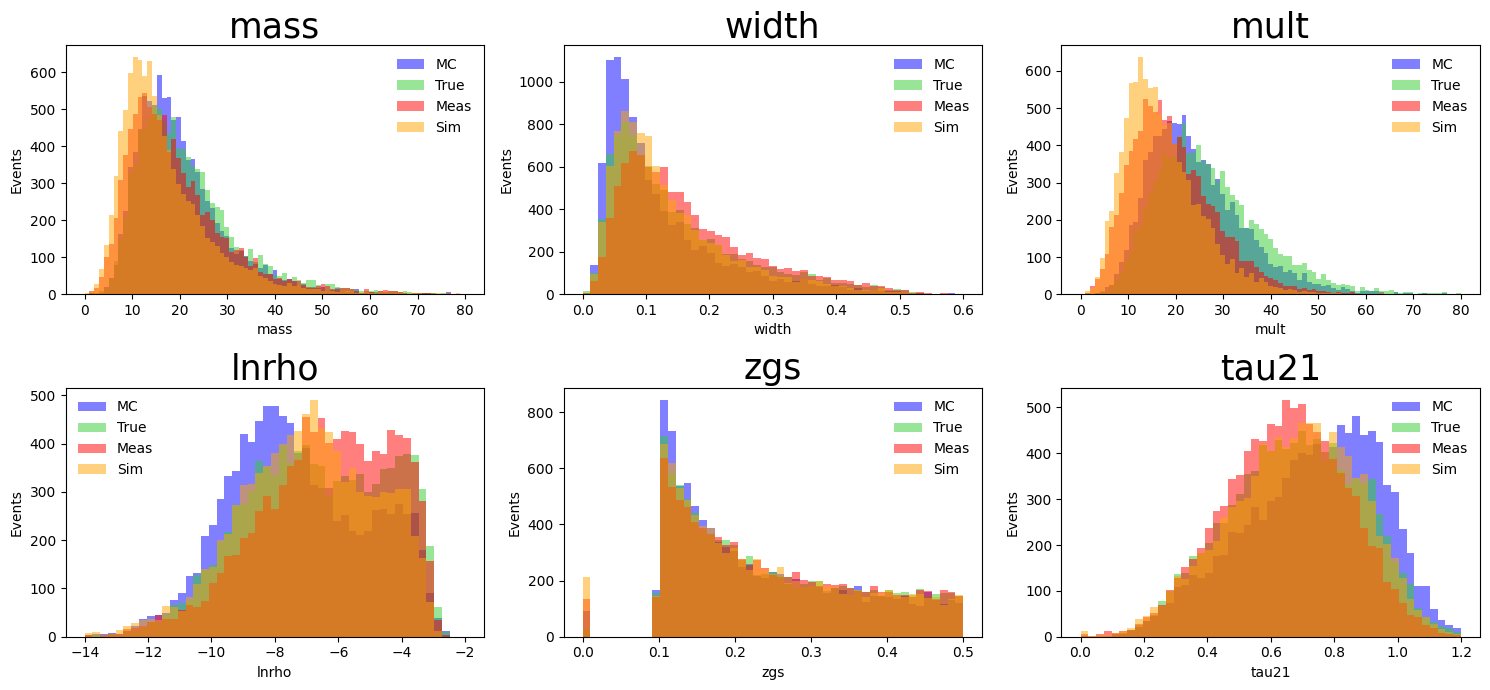

In [12]:
binning = [
    np.linspace(0, 80, 80),
    np.linspace(0, 0.6, 50),
    np.linspace(0, 80, 80),
    np.linspace(-14, -2, 50),
    np.linspace(0, 0.5, 50),
    np.linspace(0, 1.2, 50),
]

    
N = len(binning)

fig, axes = plt.subplots(2, 3, figsize=(15,7))

for i,ax in enumerate(axes.ravel()):
    if (i >= N): break
    _,_,_=ax.hist(mc_data[:,i], binning[i], color='blue', alpha=0.5, label="MC")
    _,_,_=ax.hist(true_data[:,i], binning[i], color='limegreen', alpha=0.5, label="True")
    _,_,_=ax.hist(meas_data[:,i], binning[i], color='red', alpha=0.5, label="Meas")
    _,_,_=ax.hist(sim_data[:,i], binning[i], color='orange', alpha=0.5, label="Sim")

    ax.set_title(labels[i],fontsize=25)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Events")
    ax.legend(frameon=False)
    
fig.tight_layout()

## Binned Omnifold w/ Decision Trees

In [13]:
num_iterations = 5

In [14]:
def binned_unfold(response, measured_hist, MC_bins, MC_low, MC_high):
    binned_weights, MC_entries, _, _ = binned_omnifold(response, measured_hist, num_iterations)
    
    omnifold_MC_hist_binned, omnifold_MC_bin_edges_binned = np.histogram(
        MC_entries.flatten(), 
        weights=binned_weights[-1][1], 
        bins=MC_bins, 
        range=[MC_low, MC_high]
    )
    omnifold_MC_bin_centers_binned = (omnifold_MC_bin_edges_binned[:-1] + omnifold_MC_bin_edges_binned[1:]) / 2

    efficiencies = response.Vefficiency()
    efficiencies_np = np.empty(efficiencies.GetNoElements())

    for i in range(efficiencies.GetNoElements()):
        efficiencies_np[i] = efficiencies[i]

    omnifold_MC_hist_binned = np.divide(
        omnifold_MC_hist_binned, 
        efficiencies_np, 
        out=np.zeros_like(omnifold_MC_hist_binned, dtype=np.float32),
        where=(
            (efficiencies_np != 0) & 
            (~np.isnan(efficiencies_np)) & 
            (~np.isinf(efficiencies_np))
        )
    )
    return omnifold_MC_hist_binned, omnifold_MC_bin_centers_binned

# Process each dataset
binned_datasets = [
    (response_mass, meas_data_mass_binned, bins_mass, bin_low_mass, bin_high_mass),
    (response_width, meas_data_width_binned, bins_widths, bin_low_widths, bin_high_widths),
    (response_mult, meas_data_mult_binned, bins_mult, bin_low_mult, bin_high_mult),
    (response_lnrho, meas_data_lnrho_binned, bins_lnrho, bin_low_lnrho, bin_high_lnrho),
    (response_zgs, meas_data_zgs_binned, bins_zgs, bin_low_zgs, bin_high_zgs),
    (response_tau21, meas_data_tau21_binned, bins_tau21, bin_low_tau21, bin_high_tau21)
]

binned_results = []
for response, measured_hist,bins, bins_low, bins_high in binned_datasets:
    result = binned_unfold(response, measured_hist, bins, bins_low, bins_high)
    binned_results.append(result)


Starting iteration 0


Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4


## Unbinned Omnifold w/ Decision Trees

In [15]:
def unbinned_unfold(unbinned_mc_data, unbinned_sim_data, unbinned_measured_data, pass_reco_mask, pass_truth_mask, num_iterations):
    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_omnifold(
        unbinned_mc_data,
        unbinned_sim_data,
        unbinned_measured_data,
        pass_reco_mask,
        pass_truth_mask,
        num_iterations
    )

    return unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned

unbinned_datasets = [
    (mc_data_mass_unbinned, sim_data_mass_unbinned, meas_data_mass_unbinned, pass_reco_mass, pass_truth_mass),
    (mc_data_width_unbinned, sim_data_width_unbinned, meas_data_width_unbinned, pass_reco_width, pass_truth_width),
    (mc_data_mult_unbinned, sim_data_mult_unbinned, meas_data_mult_unbinned, pass_reco_mult, pass_truth_mult),
    (mc_data_lnrho_unbinned, sim_data_lnrho_unbinned, meas_data_lnrho_unbinned, pass_reco_lnrho, pass_truth_lnrho),
    (mc_data_zgs_unbinned, sim_data_zgs_unbinned,  meas_data_zgs_unbinned, pass_reco_zgs, pass_truth_zgs),
    (mc_data_tau21_unbinned, sim_data_tau21_unbinned,meas_data_tau21_unbinned, pass_reco_tau21, pass_truth_tau21)
]

unbinned_results = []
for mc_data, sim_data, measured_data, pass_reco, pass_truth in unbinned_datasets:
    result = unbinned_unfold(mc_data, sim_data, measured_data, pass_reco, pass_truth, num_iterations)
    unbinned_results.append(result)


Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4


## Iterative Baysian Unfolding

In [16]:
IBU_RooUnfold_mass = ROOT.RooUnfoldBayes(response_mass, meas_data_mass_binned, num_iterations)
hReco_mass = IBU_RooUnfold_mass.Hreco()
roounfold_data_mass, roounfold_data_mass_x = dh.TH1_to_numpy(hReco_mass)

IBU_RooUnfold_width = ROOT.RooUnfoldBayes(response_width, meas_data_width_binned, num_iterations)
hReco_width = IBU_RooUnfold_width.Hreco()
roounfold_data_width, roounfold_data_width_x = dh.TH1_to_numpy(hReco_width)

IBU_RooUnfold_mult = ROOT.RooUnfoldBayes(response_mult, meas_data_mult_binned, num_iterations)
hReco_mult = IBU_RooUnfold_mult.Hreco()
roounfold_data_mult, roounfold_data_mult_x = dh.TH1_to_numpy(hReco_mult)

IBU_RooUnfold_lnrho = ROOT.RooUnfoldBayes(response_lnrho, meas_data_lnrho_binned, num_iterations)
hReco_lnrho = IBU_RooUnfold_lnrho.Hreco()
roounfold_data_lnrho, roounfold_data_lnrho_x = dh.TH1_to_numpy(hReco_lnrho)

IBU_RooUnfold_zgs = ROOT.RooUnfoldBayes(response_zgs, meas_data_zgs_binned, num_iterations)
hReco_zgs = IBU_RooUnfold_zgs.Hreco()
roounfold_data_zgs, roounfold_data_zgs_x = dh.TH1_to_numpy(hReco_zgs)

IBU_RooUnfold_tau21 = ROOT.RooUnfoldBayes(response_tau21, meas_data_tau21_binned, num_iterations)
hReco_tau21 = IBU_RooUnfold_tau21.Hreco()
roounfold_data_tau21, roounfold_data_tau21_x = dh.TH1_to_numpy(hReco_tau21)


IBU_data = [
    (roounfold_data_mass, roounfold_data_mass_x),
    (roounfold_data_width, roounfold_data_width_x),
    (roounfold_data_mult, roounfold_data_mult_x),
    (roounfold_data_lnrho, roounfold_data_lnrho_x),
    (roounfold_data_zgs, roounfold_data_zgs_x),
    (roounfold_data_tau21, roounfold_data_tau21_x),
]


Using response matrix priors
Priors:

Vector (50)  is as follows

     |        1  |
------------------
   0 |0.00010022 
   1 |0.000200441 
   2 |0.00150331 
   3 |0.00791742 
   4 |0.0207456 
   5 |0.0387853 
   6 |0.0607336 
   7 |0.0764682 
   8 |0.0834837 
   9 |0.0861896 
  10 |0.0880938 
  11 |0.0766687 
  12 |0.0729605 
  13 |0.0590299 
  14 |0.0572259 
  15 |0.0444979 
  16 |0.0387853 
  17 |0.0299659 
  18 |0.0246542 
  19 |0.0194428 
  20 |0.0175386 
  21 |0.0153337 
  22 |0.0130287 
  23 |0.0117258 
  24 |0.00942073 
  25 |0.00771698 
  26 |0.00591301 
  27 |0.00551213 
  28 |0.00420926 
  29 |0.00270595 
  30 |0.00300661 
  31 |0.00270595 
  32 |0.00180397 
  33 |0.00180397 
  34 |0.00130287 
  35 |0.00170375 
  36 |0.000601323 
  37 |0.00130287 
  38 |0.00110243 
  39 |0.000601323 
  40 |0.000601323 
  41 |0.000501102 
  42 |0.00010022 
  43 |0.000200441 
  44 |0.000501102 
  45 |0.000601323 
  46 |0.000200441 
  47 |0.000501102 
  48 |0.000300661 
  49 |0 

Now unfolding

input_line_101:7:55: warning: 'Hreco' is deprecated: #REASON [-Wdeprecated-declarations]
      new (ret) (TH1*) (((RooUnfoldT<TH1, TH2>*)obj)->Hreco());
                                                      ^
/global/homes/t/trevin/Projects/lbnl-omnifold-testing/RooUnfold/src/RooUnfold.h:86:3: note: 'Hreco' has been explicitly marked deprecated here
  DEPRECATED("Hreco is considered ambigious and should no longer be used, please use Hunfold instead") virtual Hist* Hreco   () { return Hunfold(RooUnfolding::kErrors); }  
  ^
/global/homes/t/trevin/Projects/lbnl-omnifold-testing/RooUnfold/src/RooUnfoldHelpers.h:14:30: note: expanded from macro 'DEPRECATED'
#define DEPRECATED(REASON) [[deprecated("#REASON")]]
                             ^
input_line_101:11:44: warning: 'Hreco' is deprecated: #REASON [-Wdeprecated-declarations]
      (void)(((RooUnfoldT<TH1, TH2>*)obj)->Hreco());
                                           ^
/global/homes/t/trevin/Projects/lbnl-omnifold-testing/RooUnfold/sr

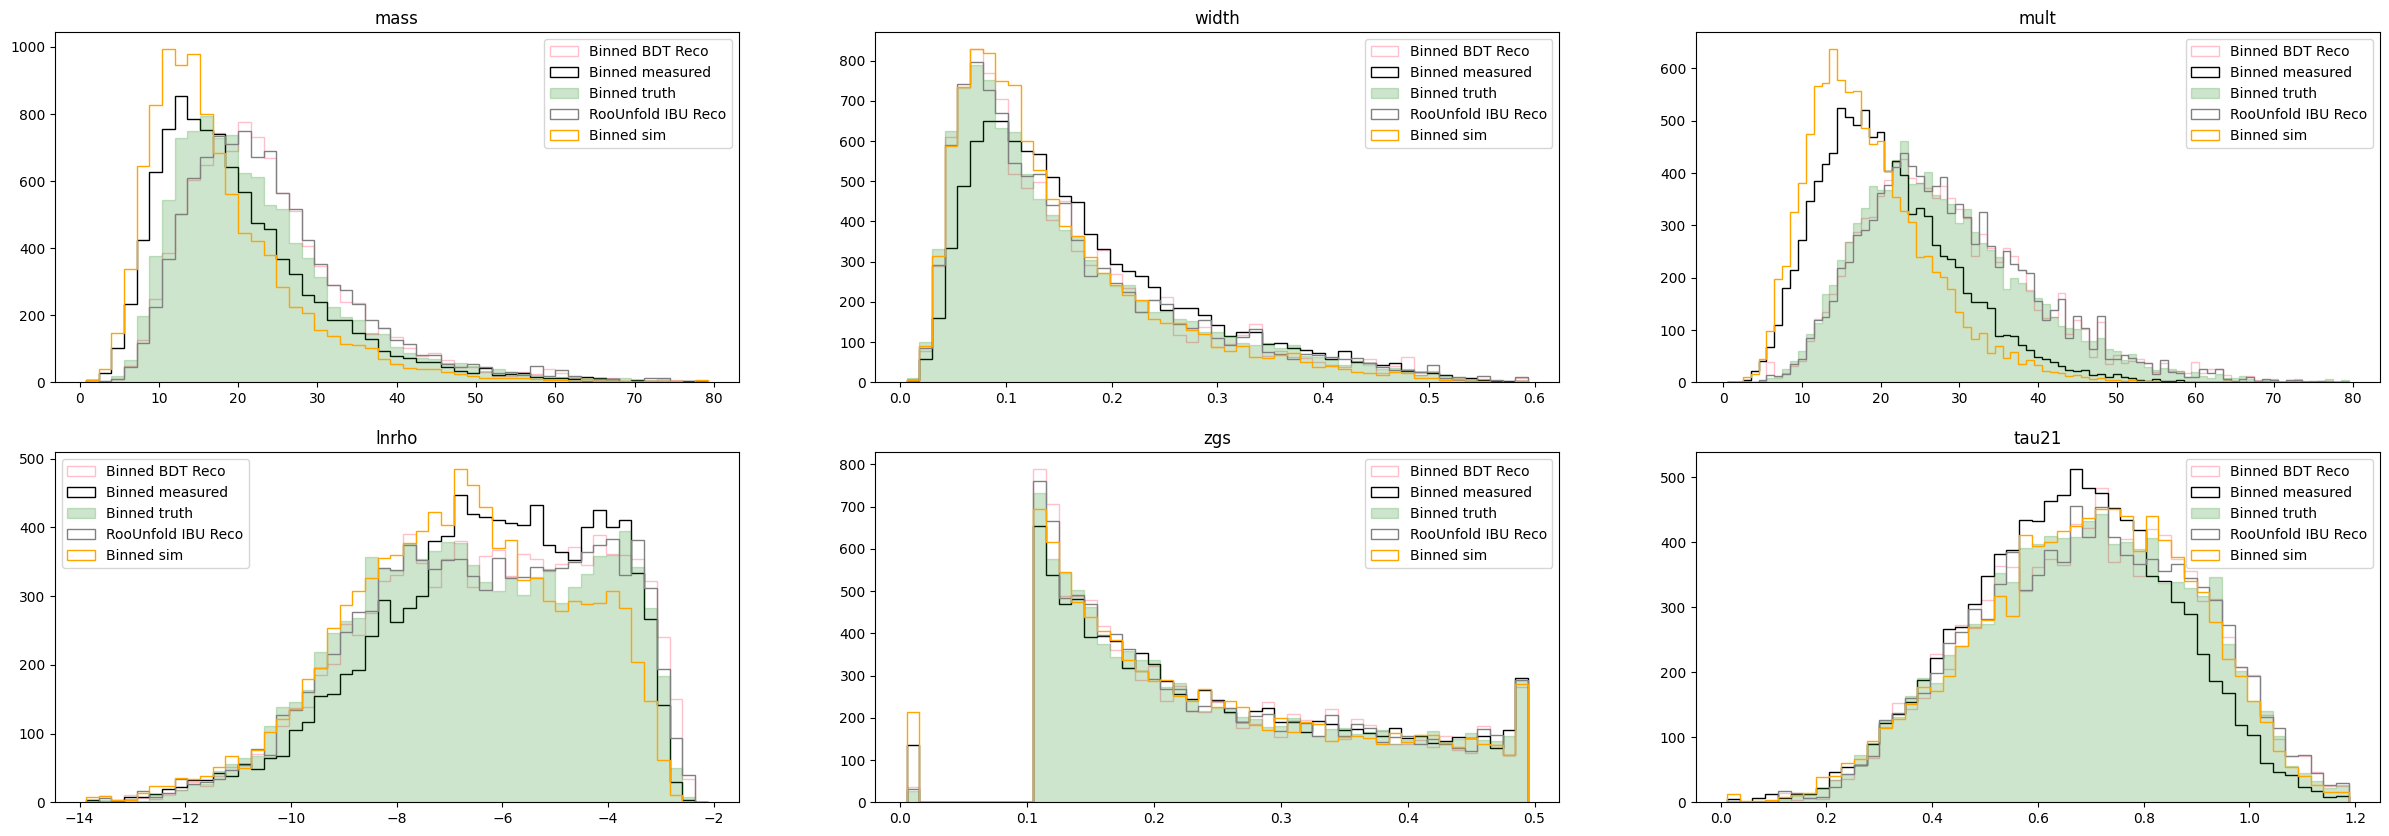

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))

iteration_to_plot = num_iterations - 1

bins = [
    [bins_mass, bin_low_mass, bin_high_mass],
    [bins_widths, bin_low_widths, bin_high_widths],
    [bins_mult, bin_low_mult, bin_high_mult],
    [bins_lnrho, bin_low_lnrho, bin_high_lnrho],
    [bins_zgs, bin_low_zgs, bin_high_zgs],
    [bins_tau21, bin_low_tau21, bin_high_tau21]
]

true_measured_sim_mc_hist = [
    [true_data_mass_binned, meas_data_mass_binned, sim_data_mass_binned, mc_data_mass_binned],
    [true_data_width_binned, meas_data_width_binned, sim_data_width_binned, mc_data_width_binned],
    [true_data_mult_binned, meas_data_mult_binned, sim_data_mult_binned, mc_data_mult_binned],
    [true_data_lnrho_binned, meas_data_lnrho_binned, sim_data_lnrho_binned, mc_data_lnrho_binned],
    [true_data_zgs_binned, meas_data_zgs_binned, sim_data_zgs_binned, mc_data_zgs_binned],
    [true_data_tau21_binned, meas_data_tau21_binned, sim_data_tau21_binned, mc_data_tau21_binned]
]

for i, axs in enumerate(axes.ravel()):
    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_results[i]

    omnifold_sim_hist_unbinned, omnifold_sim_bin_edges_unbinned = np.histogram(
        MC_entries_unbinned.flatten(),
        weights=unbinned_weights[iteration_to_plot, 1],
        bins=bins[i][0],
        range=[bins[i][1], bins[i][2]]
    )
    omnifold_sim_bin_centers_unbinned = (omnifold_sim_bin_edges_unbinned[:-1] + omnifold_sim_bin_edges_unbinned[1:]) / 2

    truth_counts, truth_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][0])
    measured_counts, measured_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][1])
    sim_counts, sim_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][2])
    mc_counts, mc_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][3])

    # axs.hist(omnifold_sim_bin_centers_unbinned, bins=omnifold_sim_bin_edges_unbinned, weights=omnifold_sim_hist_unbinned, histtype='step', label="Unbinned BDT Reco", linewidth=1, color='red')
    axs.hist(binned_results[i][1], bins=binned_results[i][1], weights=binned_results[i][0], histtype='step', label="Binned BDT Reco", linewidth=1, color='pink')
    axs.hist(measured_bin_centers, bins=measured_bin_centers, weights=measured_counts, histtype='step', label="Binned measured", linewidth=1 ,color='black')
    axs.hist(truth_bin_centers, bins=truth_bin_centers, weights=truth_counts, histtype='step', label="Binned truth", linewidth=1, color='green', fill=True, alpha=0.2)
    axs.hist(IBU_data[i][1], bins=IBU_data[i][1], weights=IBU_data[i][0], histtype='step', label="RooUnfold IBU Reco", linewidth=1, color='grey')
    axs.hist(sim_bin_centers, bins=sim_bin_centers, weights=sim_counts, histtype='step', label="Binned sim", linewidth=1, color='orange')

    axs.title.set_text(labels[i])
    axs.legend()

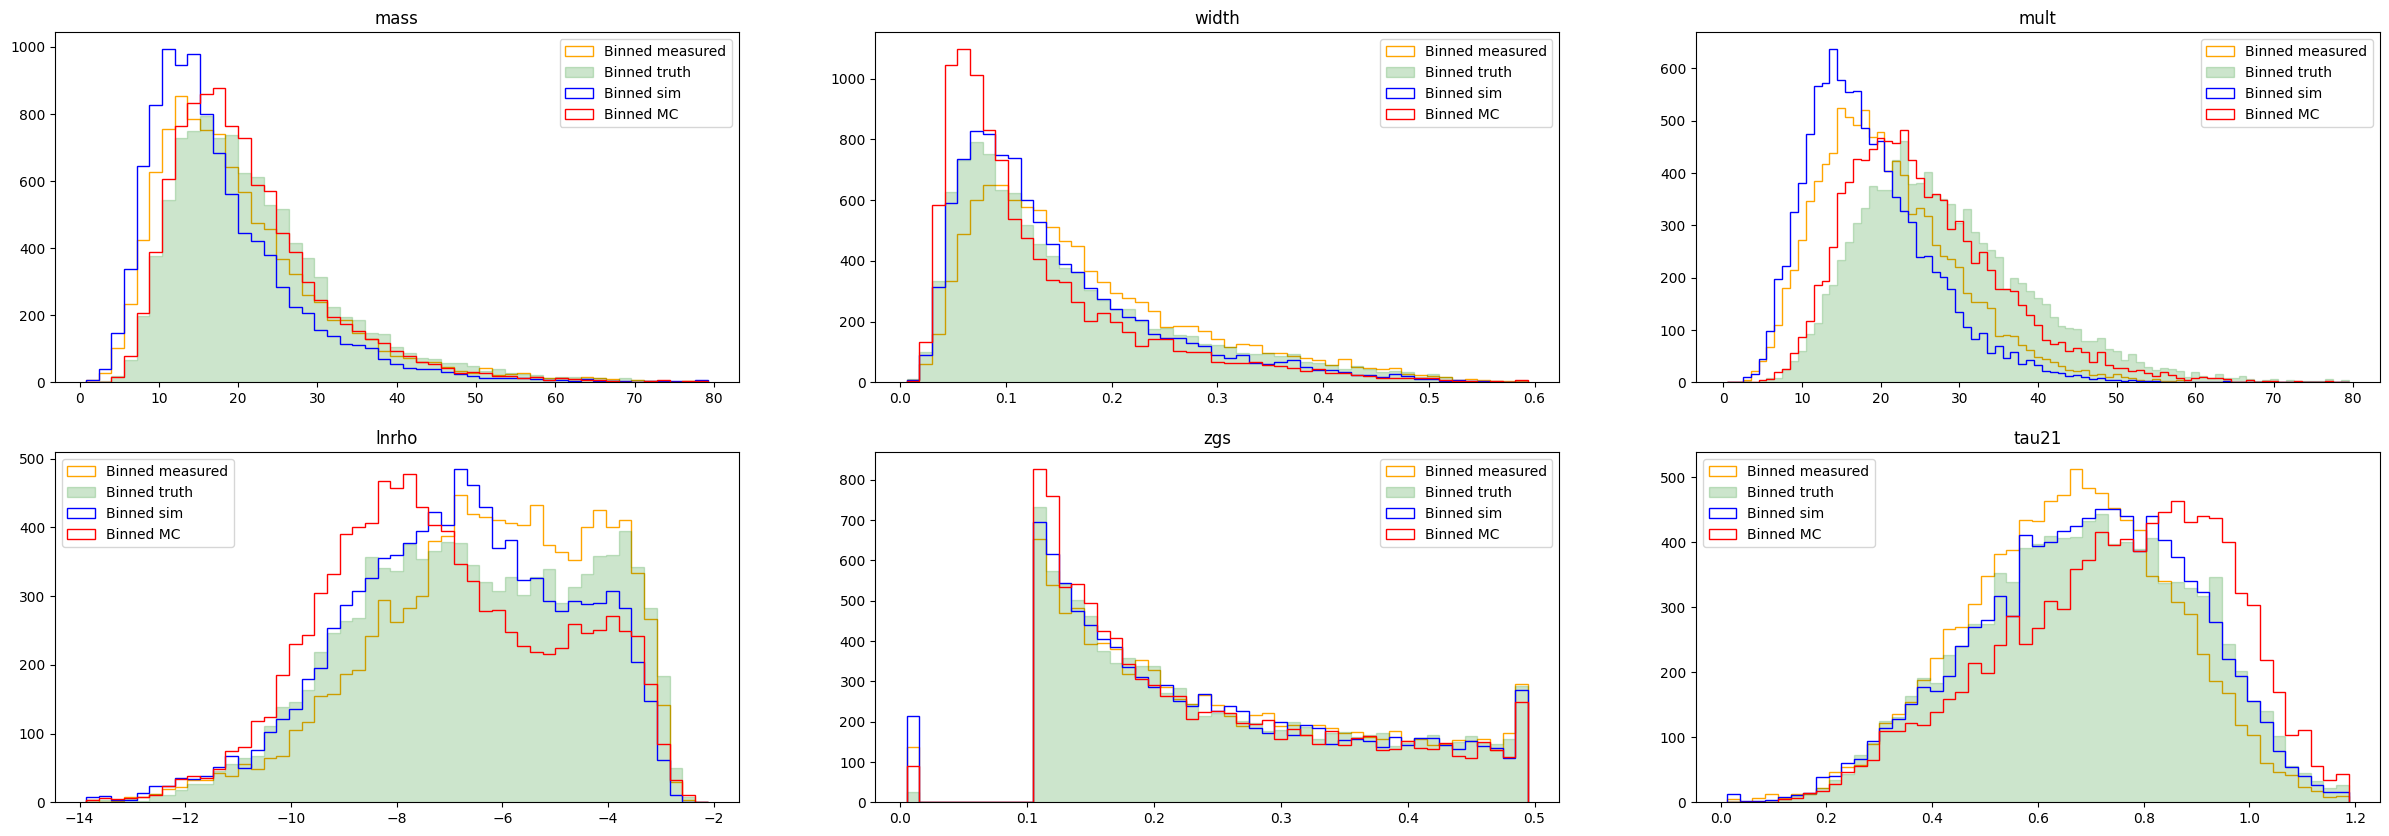

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))

iteration_to_plot = num_iterations - 1

bins = [
    [bins_mass, bin_low_mass, bin_high_mass],
    [bins_widths, bin_low_widths, bin_high_widths],
    [bins_mult, bin_low_mult, bin_high_mult],
    [bins_lnrho, bin_low_lnrho, bin_high_lnrho],
    [bins_zgs, bin_low_zgs, bin_high_zgs],
    [bins_tau21, bin_low_tau21, bin_high_tau21]
]

true_measured_sim_mc_hist = [
    [true_data_mass_binned, meas_data_mass_binned, sim_data_mass_binned, mc_data_mass_binned],
    [true_data_width_binned, meas_data_width_binned, sim_data_width_binned, mc_data_width_binned],
    [true_data_mult_binned, meas_data_mult_binned, sim_data_mult_binned, mc_data_mult_binned],
    [true_data_lnrho_binned, meas_data_lnrho_binned, sim_data_lnrho_binned, mc_data_lnrho_binned],
    [true_data_zgs_binned, meas_data_zgs_binned, sim_data_zgs_binned, mc_data_zgs_binned],
    [true_data_tau21_binned, meas_data_tau21_binned, sim_data_tau21_binned, mc_data_tau21_binned]
]


for i, axs in enumerate(axes.ravel()):
    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_results[i]

    omnifold_sim_hist_unbinned, omnifold_sim_bin_edges_unbinned = np.histogram(
        MC_entries_unbinned.flatten(),
        weights=unbinned_weights[iteration_to_plot, 1],
        bins=bins[i][0],
        range=[bins[i][1], bins[i][2]]
    )
    omnifold_sim_bin_centers_unbinned = (omnifold_sim_bin_edges_unbinned[:-1] + omnifold_sim_bin_edges_unbinned[1:]) / 2

    truth_counts, truth_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][0])
    measured_counts, measured_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][1])
    sim_counts, sim_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][2])
    mc_counts, mc_bin_centers = dh.TH1_to_numpy(true_measured_sim_mc_hist[i][3])
    
    axs.hist(measured_bin_centers, bins=measured_bin_centers, weights=measured_counts, histtype='step', label="Binned measured", linewidth=1 ,color='orange')
    axs.hist(truth_bin_centers, bins=truth_bin_centers, weights=truth_counts, histtype='step', label="Binned truth", linewidth=1, color='green', fill=True, alpha=0.2)
    axs.hist(sim_bin_centers, bins=sim_bin_centers, weights=sim_counts, histtype='step', label="Binned sim", linewidth=1, color='blue')
    axs.hist(mc_bin_centers, bins=mc_bin_centers, weights=mc_counts, histtype='step', label="Binned MC", linewidth=1, color='red')

    axs.title.set_text(labels[i])
    axs.legend()